# Исследование факторов, определяющих успешность видеоигр

Этот проект — исследование для интернет-магазина «Стримчик», который продает по всему миру компьютерные игры. Из открытых источников нам доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

Задача — выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Наши данные — до 2016 года. Представим, что сейчас декабрь 2016-го, и мы планируем кампанию на 2017-й.

## Содержание<a name="Содержание"></a>

1. [Знакомство с данными](#1.-Знакомство-с-данными)
2. [Подготовка данных](#2.-Подготовка-данных)
	1. [Замена названий столбцов](#Замена-названий-столбцов)
	2. [Удаление проблемных строк](#Удаление-проблемных-строк)
	3. [Поиск и обработка дубликатов](#Поиск-и-обработка-дубликатов)
	4. [Замена типа данных](#Замена-типа-данных)
	5. [Подсчет продаж во всех регионах](#Подсчет-продаж-во-всех-регионах)
3. [Исследовательский анализ данных](#3.-Исследовательский-анализ-данных)
	1. [Сколько игр выпускалось в разные годы](#Сколько-игр-выпускалось-в-разные-годы)
	2. [Изучение продаж по платформам](#Изучение-продаж-по-платформам)
	3. [Потенциально прибыльные платформы](#Потенциально-прибыльные-платформы)
	4. [Диаграммы размаха количества проданных игр по актуальным платформам](#Диаграммы-размаха-количества-проданных-игр-по-актуальным-платформам)
	5. [Влияние отзывов критиков и пользователей на продажи](#Влияние-отзывов-критиков-и-пользователей-на-продажи)
	6. [Исследование жанров](#Исследование-жанров)
4. [Портреты пользователей из разных регионов](#4.-Портреты-пользователей-из-разных-регионов)
	1. [Топ-5 платформ по популярности для каждого региона](#Топ-5-платформ-по-популярности-для-каждого-региона)
	2. [Топ-5 жанров по популярности для каждого региона](#Топ-5-жанров-по-популярности-для-каждого-региона)
	3. [Влияние рейтинга ESRB на продажи в регионе](#Влияние-рейтинга-ESRB-на-продажи-в-регионе)
5. [Общий вывод](#5.-Общий-вывод)

## 0. Импорт библиотек

Чтобы открыть файлы, нам нужна библиотека `pandas`. Импортируем ее. Также нам понадобится `matplotlib` для работы с графиками, некоторые математические и статические методы из `numpy` и `scipy`. Добавим и их.

In [1]:
import numpy as np

import pandas as pd
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt

## 1. Знакомство с данными<a name="1.-Знакомство-с-данными"></a>

Сохраним датафрейм в переменную `df` и начнем знакомство с данными с первых 10 строк таблицы.

In [2]:
df = pd.read_csv('games.csv')
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Описание данных

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Видно, что названия столбцов не приведены к нижнему регистру. Также в глаза бросается, что значения в столбце с годом релиза типа `float`, а не `integer`. В столбцах с оценками и рейтингом есть пропуски.

Посмотрим на общую информацию.

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Из первой таблицы видно, что у двух игр нет названий и еще у двух нет жанров. Оказалось, что это одни и те же игры:

In [4]:
df[(df['Name'].isna()==True) | (df['Genre'].isna()==True)]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Избавимся от них при предобработке данных. Также удалим 269 игр, у которых отсутсвуют даты релиза. Мы не можем их заполнить автоматически, да и дроп составит меньше 2% от выборки. 

С оценками критиков и пользователей сложнее: пропусков слишком много, поэтому просто удалить строки с ними мы не можем. Но и заполнять их не будем. Наверняка оценки зависят от продаж, от платформы и от жанра. А в исследовании нам как раз понадобится изучить корреляцию оценок с этими параметрами. Если заполнить пропуски по ним, это исказит результаты исследования. Нулями заполнять тоже нельзя, потому что они испортят метрики локации данных, например среднее и медиану. NaN'ы при их расчете не учитываются.

В столбце с пользовательскими оценками есть ячейки со значением tbd:

In [5]:
df[df['User_Score']=='tbd']

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Tbd — это аббревиатура от to be determined, что переводится как «будет определено». То есть фактически это тоже пропуски. Заменим их на NaN'ы, чтобы со столбцом можно было проводить математические операции.

Пропуски в столбце с возрастным рейтингом ESRB мы тоже не можем заполнить.

И последнее: неправильный тип данных не только у столбца с годом релиза, но и у пользовательского рейтинга. Исправим это при предобработке.

**Откуда взялись проблемы с данными?**

Проблем много, поэтому рассмотрим каждую отдельно.

- Неправильные названия столбцов, скорее всего, появились из-за человеческого фактора. Ведь в табличном редакторе отформатированные названия выглядят аккуратнее и более логичны.
- Две игры без имени и жанра — скорее машинный сбой, а не незаполненные человеком данные.
- А вот отсутсвующие значения в дате релиза похожи на недостаток информации об игре, чем на какой-то сбой.
- То же самое можно сказать про оценки критиков, пользователей и рейтинг ESRB. Скорее всего, рецензий от критиков или простых игроков либо не было, либо было очень мало, чтобы считать их репрезентативными и заносить в таблицу. На это же намекают tbd в столбце с пользовательскими оценками.
- Рейтинг ESRB может отсутсвовать, потому что игра не проходила соответсвующую сертификацию.
- Неправильные типы данных, скорее всего, возникли из-за неправильной выгрузки. Здесь могли быть и машинный сбой, и неправильные настройки, выгруженные человеком.

### Вывод

Мы изучили данные и нашли в них много проблем, которые надо будет устранить при предобработке.
1. Названия столбцов не привидены к нижнему регистру.
2. У столбцов `Year_of_Release` и `User_Score` неправильный тип данных.
3. Есть пропуски и неправильные значения, которые придется обрабатывать разными способами.

[К содержанию](#Содержание)

## 2. Подготовка данных<a name="2.-Подготовка-данных"></a>

### Замена названий столбцов<a name="Замена-названий-столбцов"></a>

Начнем подготовку данных с приведения названий столбцов к нижнему регистру. Для этого напишем небольшую функцию и запишем результат ее работы в список с названими колонок нашего датафрейма `df`. Сразу проверим новые значения.

In [6]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Теперь имена колонок написаны только в нижнем регистре.

### Удаление проблемных строк<a name="Удаление-проблемных-строк"></a>

Напомним, что мы решили избавиться от строк, в которых пропущены имена, жанр или дата релиза. Избавиться от этих строк нужно до замены типа данных, чтобы пропуски в столбцах `genre` и `year_of_release` не мешали ей. Например, мы не сможем привести колонку с датой релиза игры к целому типу данных, потому что NaN типа float.

Для удаления  воспользуемся методами `drop()`, который, собственно, удаляет строчки, и `reset_index()`, чтобы сбросить индексы датафрейма. Сразу проверим, что получилось.

In [7]:
df = df.drop(df[df['name'].isna()==True].index).reset_index(drop=True)
df = df.drop(df[df['year_of_release'].isna()==True].index).reset_index(drop=True)
len(df[(df['name'].isna()==True) | (df['genre'].isna()==True) | (df['year_of_release'].isna()==True)])

0

Удаление прошло успешно, и теперь в нашем датафрейме нет строк без названия игры, жанра или года выпуска.

### Поиск и обработка дубликатов<a name="Поиск-и-обработка-дубликатов"></a>

Теперь займеся поиском и удалением дубликатов. Это надо сделать до замены типа данных, так как у нас есть категориальные переменные. Если присвоить не очищенному от дубликатов столбцу категориальный тип, то одинаковые значения, записанные в разных регистрах, будут считаться разными, что неправильно.

Обработаем датафрейм следующим образом:
1. Сохраним столбцы `name`, `platform` и `genre` в соответствующие переменные.
2. Приведем эти столбцы в датафрейме к нижнему регистру.
3. Проверим, есть ли в преобразованном датафрейме дубликаты. Если есть, удалим строчки с ними.
4. Присвоим столбцам `name`, `platform` и `genre` значения соответсвующих переменных.
5. Сбросим индексы датафрейма, если окажется, что в нем были дубликаты.

Пункт 2 нужен для поиска одинаковых строк, записанных в разных регистрах. А 1 и 4 — чтобы имена собственные оставались опрятными с заглавными буквами 🙂

In [8]:
#1 
initial_name = df['name'].copy()
initial_platform = df['platform'].copy()
initial_genre = df['genre'].copy()

#2
df['name'] = df['name'].str.lower()
df['platform'] = df['platform'].str.lower()
df['genre'] = df['genre'].str.lower()

#3
df.duplicated().sum()

0

Оказалось, что в датафрейме дубликатов нет.

In [9]:
#5
df['name'] = initial_name
df['platform'] = initial_platform
df['genre'] = initial_genre

### Замена типа данных<a name="Замена-типа-данных"></a>

Следующий этап подготовки — замена типа данных. Вот какие типы должны быть у столбцов:

* **object**: name
* **category**: platform, genre, rating
* **int**: year_of_release
* **float**: na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score

Напомним, что в столбце с оценками пользователей есть значение tbd, которое мы решили заменить на NaN, так как tbd — это не оценка. Сделаем это до замены типов.

In [10]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)

type_dict = {
    'name': 'object',
    'platform': 'category',
    'genre': 'category',
    'rating': 'category',
    'year_of_release': 'uint16',
    'na_sales': 'float32',
    'eu_sales': 'float32',
    'jp_sales': 'float32',
    'other_sales': 'float32',
    'critic_score': 'float32',
    'user_score': 'float32'
}
df = df.astype(type_dict, errors = 'ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16444 non-null  object  
 1   platform         16444 non-null  category
 2   year_of_release  16444 non-null  uint16  
 3   genre            16444 non-null  category
 4   na_sales         16444 non-null  float32 
 5   eu_sales         16444 non-null  float32 
 6   jp_sales         16444 non-null  float32 
 7   other_sales      16444 non-null  float32 
 8   critic_score     7983 non-null   float32 
 9   user_score       7463 non-null   float32 
 10  rating           9768 non-null   category
dtypes: category(3), float32(6), object(1), uint16(1)
memory usage: 596.3+ KB


Теперь у всех столбцов правильные типы данных. Переходим к последнему эту подготовки — подсчету суммарных продаж.

### Подсчет продаж во всех регионах<a name="Подсчет-продаж-во-всех-регионах"></a>

Чтобы подсчитать суммарные продажи во всех регионах, достаточно сложить столбцы с продажами в разных регионах. Сделаем это и запишем результат в новый столбец `total_sales`. После этого посмотрим, как теперь выглядит наш датафрейм.

In [11]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.360001,28.959999,3.77,8.45,76.0,8.0,E,82.539993
1,Super Mario Bros.,NES,1985,Platform,29.080000,3.580000,6.81,0.77,NaN,NaN,NaN,40.240002
2,Mario Kart Wii,Wii,2008,Racing,15.680000,12.760000,3.79,3.29,82.0,8.3,E,35.520000
3,Wii Sports Resort,Wii,2009,Sports,15.610000,10.930000,3.28,2.95,80.0,8.0,E,32.770000
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.270000,8.890000,10.22,1.00,NaN,NaN,NaN,31.380001
...,...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.000000,0.000000,0.01,0.00,NaN,NaN,NaN,0.010000
16440,LMA Manager 2007,X360,2006,Sports,0.000000,0.010000,0.00,0.00,NaN,NaN,NaN,0.010000
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.000000,0.000000,0.01,0.00,NaN,NaN,NaN,0.010000
16442,Spirits & Spells,GBA,2003,Platform,0.010000,0.000000,0.00,0.00,NaN,NaN,NaN,0.010000


### Вывод

Мы привели названия столбцов к нижнему регистру, удалили ненужные строки, проверили, что в данных нет дубликатов, привели данные к правильным типам и рассчитали суммарные продажи игр. Теперь данные годятся для исследовательского анализа и проверки гипотез.

[К содержанию](#Содержание)

## 3. Исследовательский анализ данных<a name="3.-Исследовательский-анализ-данных"></a>

### Сколько игр выпускалось в разные годы<a name="Сколько-игр-выпускалось-в-разные-годы"></a>

Начнем исследовать данные с изучения распределения количества релизов по годам.

In [12]:
n_games_per_year = df.groupby('year_of_release')['name'].count()

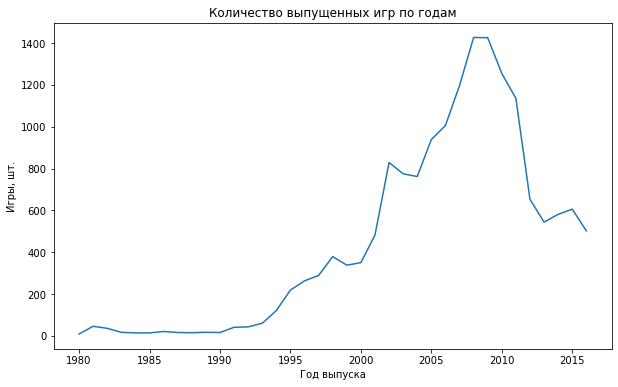

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(n_games_per_year)

ax = plt.gca()
ax.set_ylabel('Игры, шт.')
ax.set_xlabel('Год выпуска')
ax.set_title('Количество выпущенных игр по годам')

n_games_per_year_graph = plt.gcf()

До 1994 года выходило меньше ста игр в год. Этого мало, чтобы считать выводы, сделанные на основе данных тех лет, репрезентативными.

Так же видим, что «расцвет» индустрии видеоигр пришелся на 2008-2009 — в эти годы вышли рекордные 1,4 тысячи игр. После 2009 начался спад в количестве ежегодных релизов, который продолжается до сих пор. Мне не кажется, что это плохой знак. Скорее качество игр растет, а вместе с ним и время на их разработку.

### Изучение продаж по платформам<a name="Изучение-продаж-по-платформам"></a>

Посмотрим, как суммарные продажи распределились по платформам.

In [14]:
total_sales_per_platform = df.groupby('platform')['total_sales'].sum()
total_sales_per_platform.sort_values(ascending=False, inplace=True)

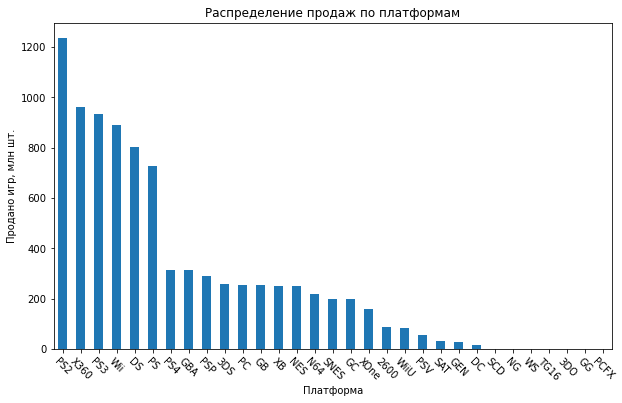

In [15]:
plt.figure(figsize=(10, 6))
total_sales_per_platform.plot(kind='bar')

ax = plt.gca()
plt.xticks(rotation=-45)
ax.set_ylabel('Продано игр, млн шт.')
ax.set_xlabel('Платформа')
ax.set_title('Распределение продаж по платформам')

total_sales_per_platform_graph = plt.gcf()

Между шестым и седьмым местами (PS и PS4) по суммарным продажам виден большой разрыв. Это потому, что в первой шестерке находятся платформы старого поколения. Игры для них продаются дольше, чем, например, для относительно новой PS4. 

На старых платформах хорошо исследовать, как долго платформы остаются актуальными. У нас на руках будет вся их история, и мы увидим и как долго длится рост продаж и когда начинается спад. Чтобы это понять, построим распределения количества проданных игр по годам.

In [16]:
top_6_platforms_per_total_sales = total_sales_per_platform.index[0:6]
top_6_platforms_per_total_sales

CategoricalIndex(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'], categories=['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', ...], ordered=False, dtype='category', name='platform')

[Text(0, 0.5, 'Количество проданных игр, млн шт.'),
 Text(0, 0.5, 'Количество проданных игр, млн шт.'),
 Text(0, 0.5, 'Количество проданных игр, млн шт.'),
 Text(0, 0.5, 'Количество проданных игр, млн шт.'),
 Text(0, 0.5, 'Количество проданных игр, млн шт.'),
 Text(0, 0.5, 'Количество проданных игр, млн шт.')]

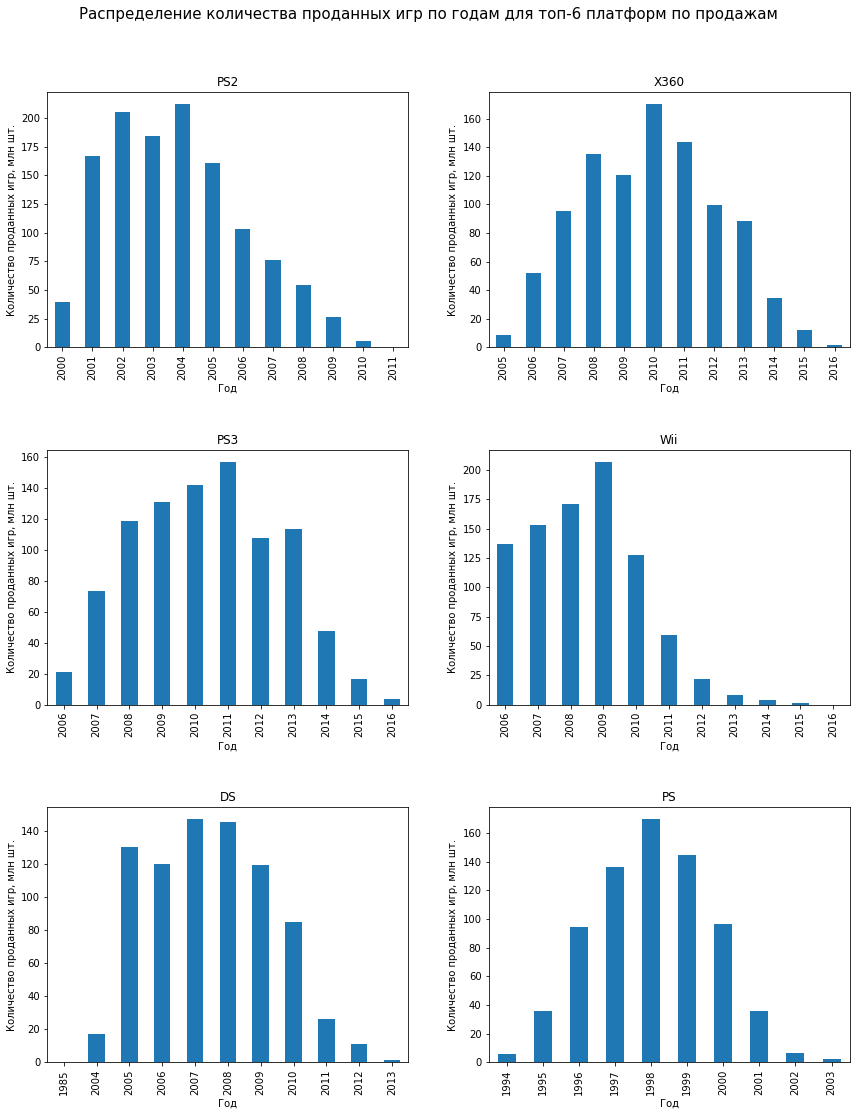

In [17]:
n_rows = 3
n_cols = 2
platform_index = 0

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 15),
                         tight_layout={'h_pad': 4, 'w_pad': 4})
fig.suptitle('Распределение количества проданных игр по годам для топ-6 платформ по продажам',
             fontsize=15, y=1.03)

for r in range(n_rows):
    for c in range(n_cols):
        (df[df['platform']==top_6_platforms_per_total_sales[platform_index]]
         .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
         .plot(kind='bar', legend=False, ax=axes[r,c],
               title=top_6_platforms_per_total_sales[platform_index]))
        platform_index += 1      

plt.setp(axes, xlabel='Год')
plt.setp(axes[:, :], ylabel='Количество проданных игр, млн шт.')

Опишем полученные распределения:

* **PS2** продавалась 12 лет, но активно только 10 (с 2000 по 2009);
* **Xbox 360** — всего 12, активно 10 (с 2006 по 2015);
* **PS3** — всего 11, активно 10 (с 2006 по 2015);
* **Nintendo Wii** — всего 11, активно 7 (с 2006 по 2012);
* **Nintendo DS** — всего 10, активно 9 (с 2004 по 2012);
* **PS** — всего 10, активно 7 (с 1995 по 2001).

Если не учитывать первую PS (потому что она очень старая), то можно сказать, что в среднем платформы «живут» 10 лет. Значит, нас будут интересовать данные с 2008 года включительно. Тогда десятый «год смерти» придется на 2017. Нам подходит такая точность, потому что на самом деле игры для платформ продаются на год-два дольше, то есть «Стримчик» успеет распродать остатки.

Сохраним данные за актуальный период в новый датафрейм `df_2008_2016`.

In [18]:
df_2008_2016 = df[df['year_of_release'] >= 2008].copy()

### Потенциально прибыльные платформы<a name="Потенциально-прибыльные-платформы"></a>

In [19]:
total_sales_per_platform_since_2008 = df_2008_2016.groupby('platform')['total_sales'].sum()
total_sales_per_platform_since_2008.sort_values(ascending=False, inplace=True)

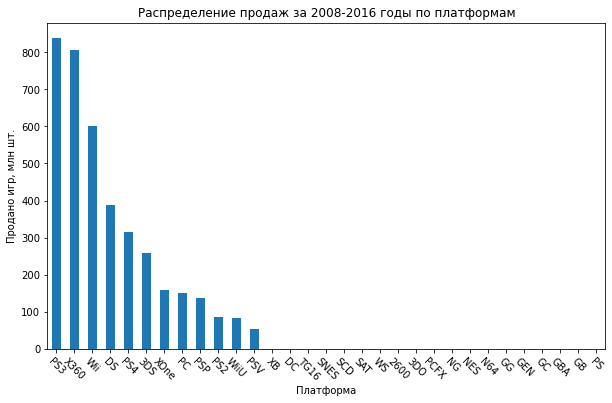

In [20]:
plt.figure(figsize=(10, 6))
total_sales_per_platform_since_2008.plot(kind='bar')

ax = plt.gca()
plt.xticks(rotation=-45)
ax.set_ylabel('Продано игр, млн шт.')
ax.set_xlabel('Платформа')
ax.set_title('Распределение продаж за 2008-2016 годы по платформам')

total_sales_per_platform_since_2008_graph = plt.gcf()

Как видно, прошлый лидер суммарных продаж PS2 откатился в конец топа, аж на десятое место. Что неудивительно, ведь она вышла в 2000 году, и ее пик популярности пришелся на более ранний год, чем 2008.

Чтобы сделать вывод о перспективности платформ, посмотрим, как распределись продажи игр для них по годам. Это поможет отсечь платформы, которые были популярны в начале периода, а сейчас продажи игр для них падают. Удобнее всего смотреть распределения на графиках, аналогичных тем, что были в предыдущем пункте.

In [21]:
platforms_since_2008 = total_sales_per_platform_since_2008.index
platforms_since_2008

CategoricalIndex(['PS3', 'X360', 'Wii', 'DS', 'PS4', '3DS', 'XOne', 'PC',
                  'PSP', 'PS2', 'WiiU', 'PSV', 'XB', 'DC', 'TG16', 'SNES',
                  'SCD', 'SAT', 'WS', '2600', '3DO', 'PCFX', 'NG', 'NES',
                  'N64', 'GG', 'GEN', 'GC', 'GBA', 'GB', 'PS'],
                 categories=['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', ...], ordered=False, dtype='category', name='platform')

[Text(0, 0.5, 'Количество проданных игр, млн шт.'),
 Text(0, 0.5, 'Количество проданных игр, млн шт.'),
 Text(0, 0.5, 'Количество проданных игр, млн шт.'),
 Text(0, 0.5, 'Количество проданных игр, млн шт.'),
 Text(0, 0.5, 'Количество проданных игр, млн шт.'),
 Text(0, 0.5, 'Количество проданных игр, млн шт.'),
 Text(0, 0.5, 'Количество проданных игр, млн шт.'),
 Text(0, 0.5, 'Количество проданных игр, млн шт.'),
 Text(0, 0.5, 'Количество проданных игр, млн шт.'),
 Text(0, 0.5, 'Количество проданных игр, млн шт.'),
 Text(0, 0.5, 'Количество проданных игр, млн шт.'),
 Text(0, 0.5, 'Количество проданных игр, млн шт.'),
 Text(0, 0.5, 'Количество проданных игр, млн шт.'),
 Text(0, 0.5, 'Количество проданных игр, млн шт.')]

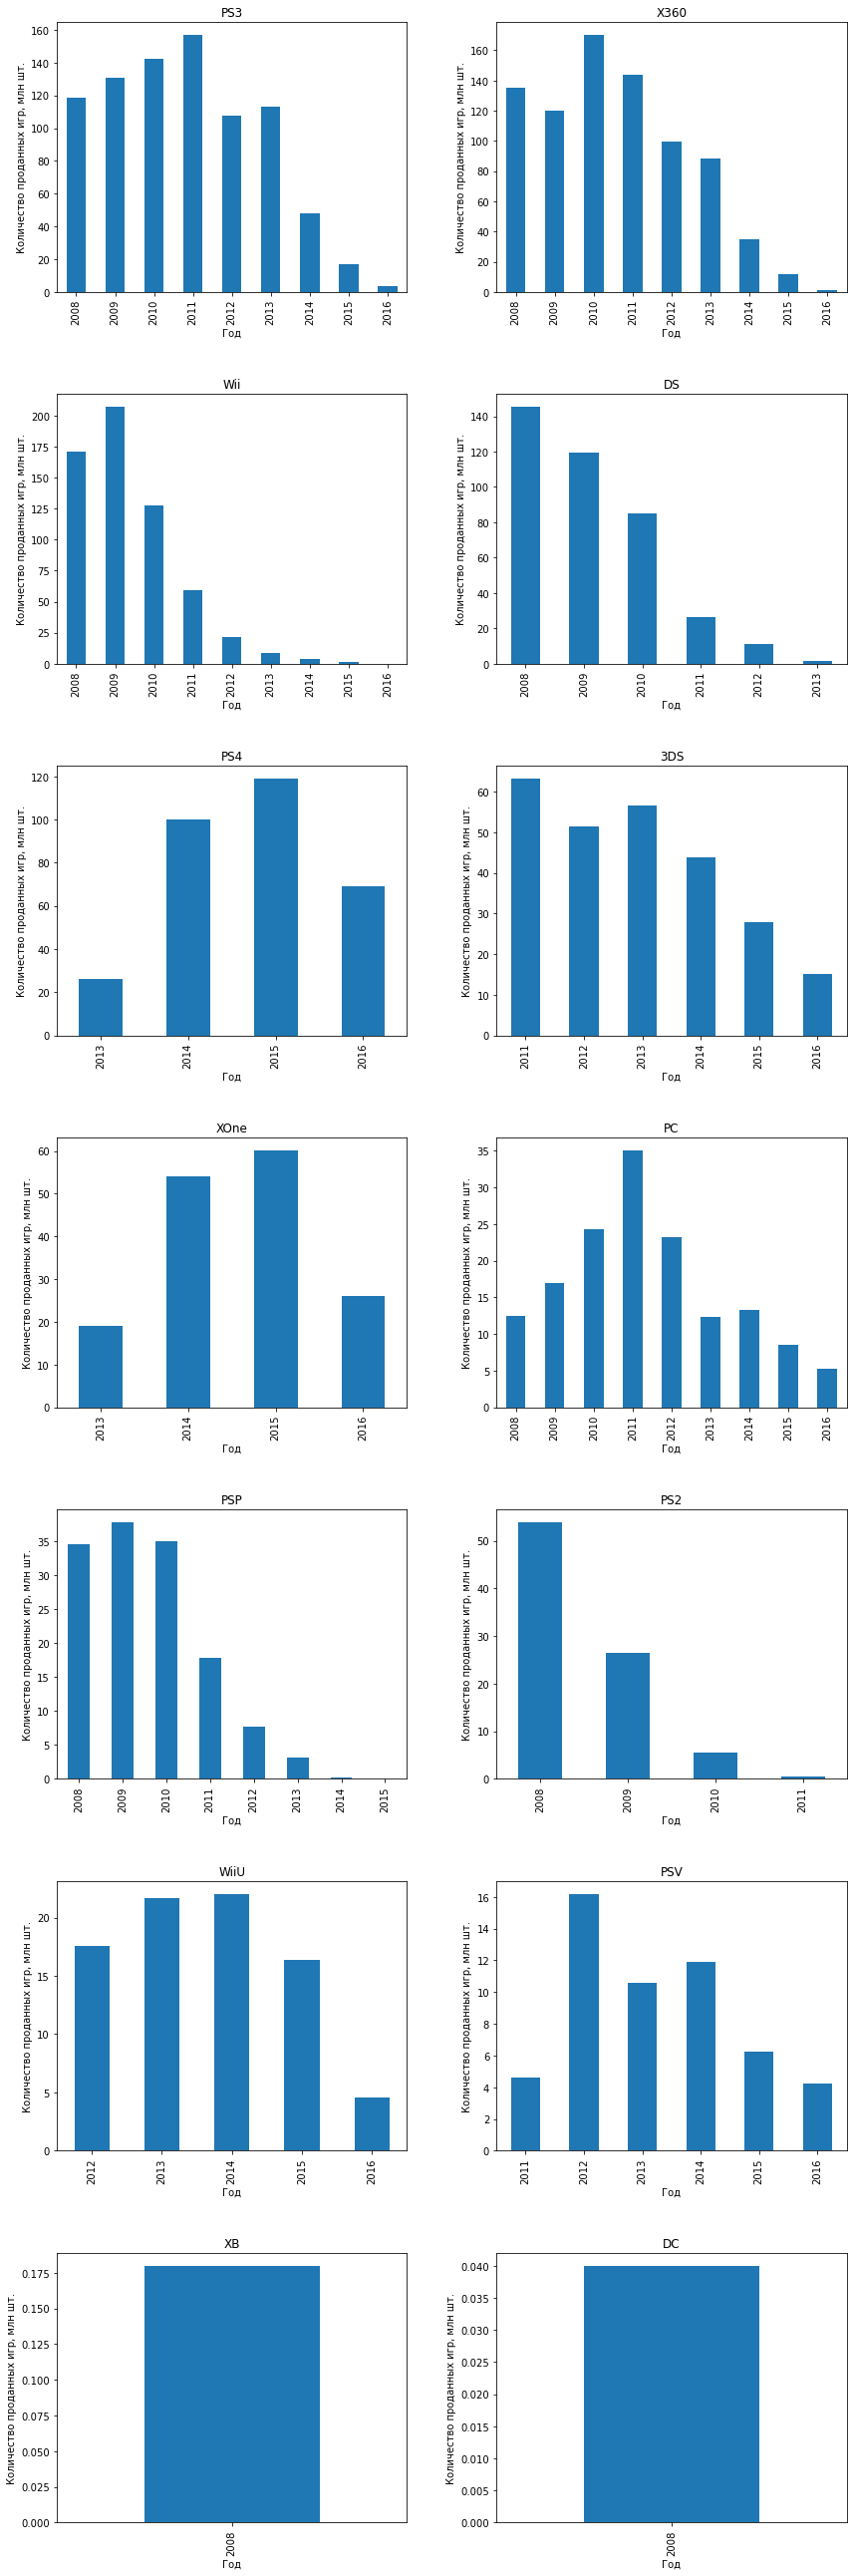

In [22]:
n_rows = 7
n_cols = 2
platform_index = 0

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 36), tight_layout={'h_pad': 4, 'w_pad': 4})

for r in range(n_rows):
    for c in range(n_cols):
        (df_2008_2016[df_2008_2016['platform']==platforms_since_2008[platform_index]]
         .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
         .plot(kind='bar', legend=False, ax=axes[r,c],
               title=platforms_since_2008[platform_index]))
        platform_index += 1      

plt.setp(axes, xlabel='Год')
plt.setp(axes[:, :], ylabel='Количество проданных игр, млн шт.')

Построенные распределения показывают, что топ-3 платформы по продажам игр за актульный период (PS3, Xbox 360 и Wii) почти исчерпали себя. Продажи игр для них падают последние пять лет, и сейчас почти равны нулю.

Самыми перспективными платформами для 2017 года я считаю PS4 и Xbox One. Это новые приставки (каждой 4 года), и продажи игр для них растут каждый год с момента запуска (если не учитывать 2016, для которого данные неполные).

Следующие по перспективности приставки — Nintendo 3DS и Nintendo Wii U. Они довольно старые (6 и 5 лет соответственно), и продажи игр для них уже начали падать, но все равно находятся на хорошем уровне. При этом хоть 3DS и старше, игры для нее продаются почти в два раза лучше, чем для Wii U. В 2015-м для 3DS продано 30 миллионов игр, а для Wii U — в районе 16. Имеющиеся данные за 2016 год говорят о еще большем перевесе в сторону 3DS.

Замыкают список перспективных платформ PC и PS Vita. Их объединяет то, что продажи игр для них падают и находятся примерно на одном уровне в районе 7-9 миллионов копий. По сравнению с другими платформами это немного. Кажется, что PC — старая платформа (ей больше 9 лет), но компьютеры обновляются постоянно и при этом поддерживают старые игры, поэтому к ним возраст не применим.

Соберем все вместе. Вот список потенциально прибыльных платформ, отсортированный по потенциалу:
1. PS4 и Xbox One,
2. Nintendo 3DS и Nintendo Wii U,
3. PC и PS Vita.

### Диаграммы размаха количества проданных игр по актуальным платформам<a name="Диаграммы-размаха-количества-проданных-игр-по-актуальным-платформам"></a>

Посмотрим на диаграммы размаха количества проданных игр по актульным платформам.

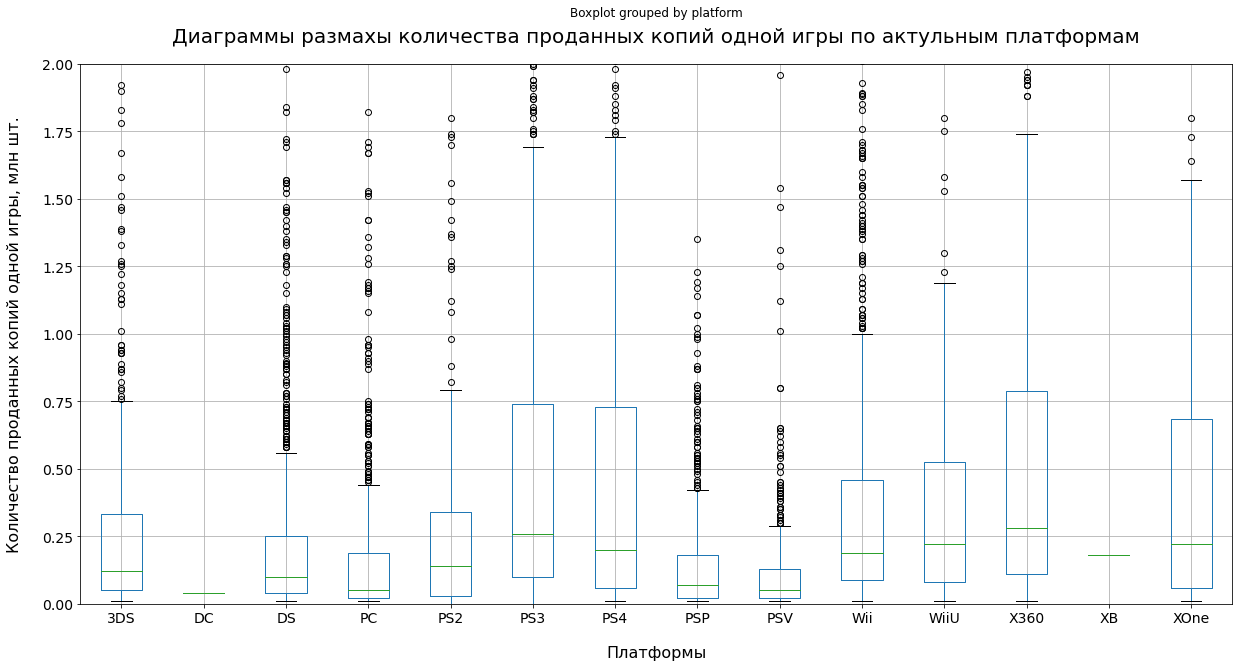

In [23]:
# Удалим ненужные категориальные значения, чтобы не было пустых диаграмм.
df_2008_2016['platform'] = df_2008_2016['platform'].cat.remove_unused_categories()

df_2008_2016.boxplot(column='total_sales', by='platform',
                     figsize=(20, 10), fontsize=14)
plt.title('Диаграммы размахы количества проданных копий одной игры по актульным платформам',
          fontsize=20, y=1.03)
plt.ylabel('Количество проданных копий одной игры, млн шт.', fontsize=16, labelpad=20)
plt.xlabel('Платформы', fontsize=16, labelpad=20)
plt.ylim(0,2)

boxplots_platforms_since_2008_graph = plt.gcf()

Видно, что самые большие медианы у платформ-лидеров по продажам игр старого поколения PS3 и Xbox 360. Медианное количество копий игры, проданных для этих платформ, примерно равно 250 тысячам штук.

Немного отстают от них лидеры актуального периода PS4 и Xbox One, а также Wii U. И у новых, и у старых поколений PS и Xbox третий квартиль в три раза больше медианы, а также длинные правые усы. У Wii U третий квартиль больше в 2 раза. Значит, для этих платформ можно смелее закупать потенциальные игровые хиты.

### Влияние отзывов критиков и пользователей на продажи<a name="Влияние-отзывов-критиков-и-пользователей-на-продажи"></a>

Сначала рассмотрим, как оценки критиков и пользователей влияют на продажи игры для самой популярной платформы по количеству проданных копий PS3. Для этого изучим матрицу диаграмм рассеяния и матрицу корреляции.

array([[<AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='total_sales', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='total_sales', ylabel='user_score'>],
       [<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='total_sales'>,
        <AxesSubplot:xlabel='total_sales', ylabel='total_sales'>]],
      dtype=object)

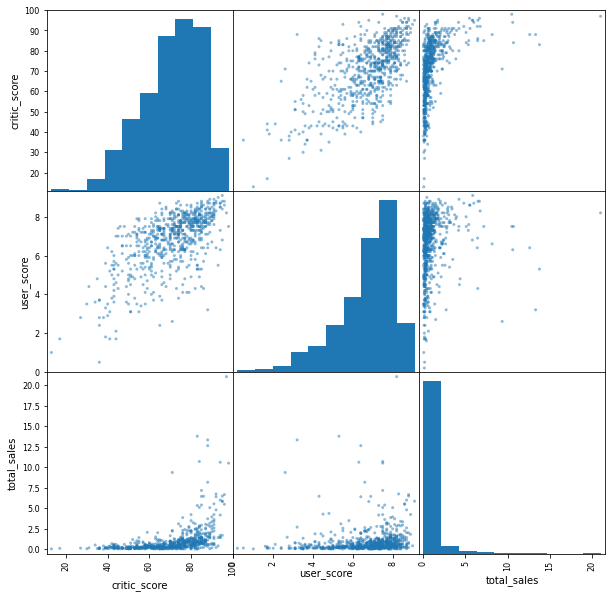

In [24]:
scatter_matrix(df_2008_2016.loc[df_2008_2016['platform']=='PS3', ['critic_score', 'user_score', 'total_sales']], 
               figsize=(10, 10))

Нам больше всего подходят диаграммы из нижнего ряда. В них по оси абсцисс идут оценки, а по оси ординат — глобальные продажи игр.

По графику с пользовательскими оценками видно, что количество проданных копий почти не зависит от них. Это можно объяснить тем, что пользователи оценивают игру после покупки. То есть с продажами скорее коррелирует количество пользовательских оценок, а не их значения.

От оценок критиков продажи зависят сильнее, чем от пользовательских, но все равно слабо. Можно построить «трубу», которая немного отклянется от оси абсцисс. Возможно, бОльшая зависимость связана с тем, что критики делятся мнениями об игре до старта продаж. Если отзывы хорошие, то игрой заинтересуется больше игроков.

In [25]:
df_2008_2016.loc[df_2008_2016['platform']=='PS3',
                 ['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.636765,0.433732
user_score,0.636765,1.000000,0.115080
total_sales,0.433732,0.115080,1.000000


Матрица корреляций подтверждает выводы, сделанные по диаграммам рассеяния. Теперь посмотрим, как они соотносятся с другими платформами, но сначала подготовим данные.

Для первого Xbox и Dreamcast за актуальный период с 2008 по 2016 вышло всего по одной игре. Из-за этого для них не строятся граффики и ломается цикл, в котором мы строим матрицы диаграмм рассеяния и матрицы корреляций. Удалим эти платформы из наших данных до начала построений.

Wii


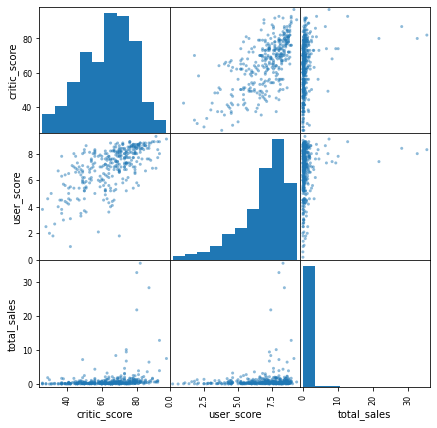

,critic_score,user_score,total_sales
critic_score,1.000000,0.646194,0.225109
user_score,0.646194,1.000000,0.130242
total_sales,0.225109,0.130242,1.000000



X360


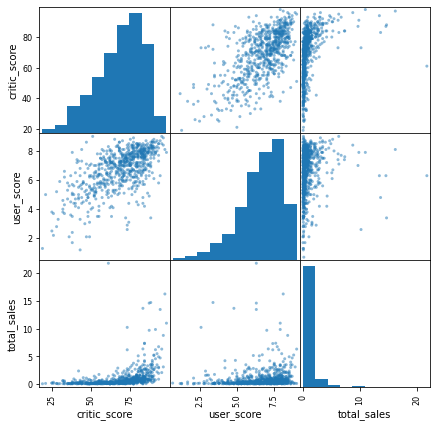

,critic_score,user_score,total_sales
critic_score,1.000000,0.616848,0.388653
user_score,0.616848,1.000000,0.101101
total_sales,0.388653,0.101101,1.000000



PS3


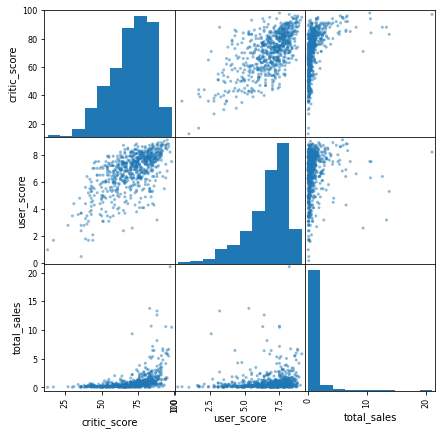

,critic_score,user_score,total_sales
critic_score,1.000000,0.636765,0.433732
user_score,0.636765,1.000000,0.115080
total_sales,0.433732,0.115080,1.000000



DS


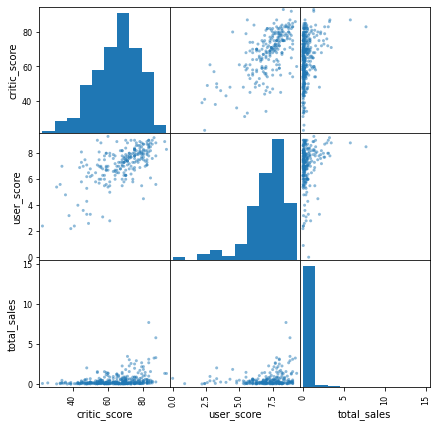

,critic_score,user_score,total_sales
critic_score,1.000000,0.623289,0.307139
user_score,0.623289,1.000000,0.199223
total_sales,0.307139,0.199223,1.000000



PS4


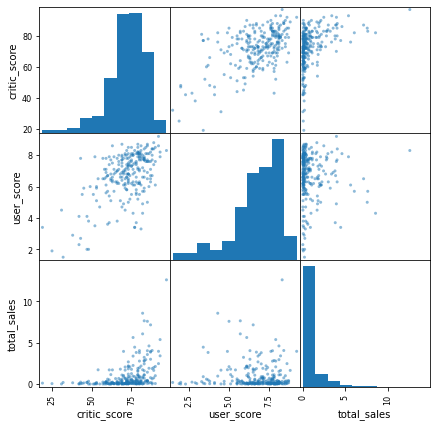

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
total_sales,0.406568,-0.031957,1.000000



3DS


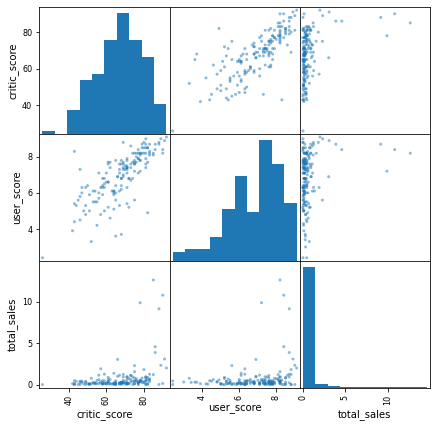

,critic_score,user_score,total_sales
critic_score,1.000000,0.745222,0.348740
user_score,0.745222,1.000000,0.222078
total_sales,0.348740,0.222078,1.000000



PC


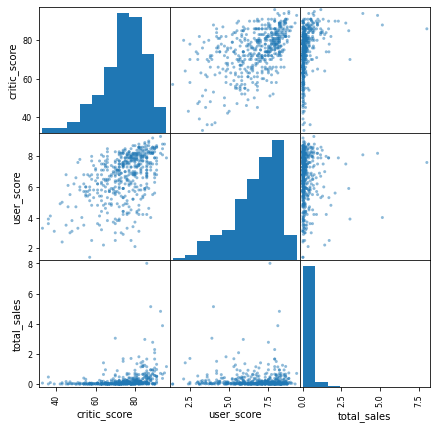

,critic_score,user_score,total_sales
critic_score,1.000000,0.491678,0.297461
user_score,0.491678,1.000000,-0.018650
total_sales,0.297461,-0.018650,1.000000



XOne


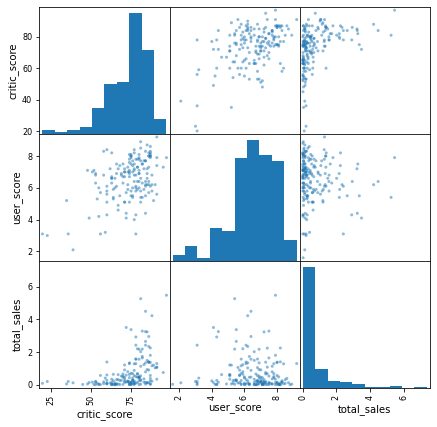

,critic_score,user_score,total_sales
critic_score,1.000000,0.472462,0.416998
user_score,0.472462,1.000000,-0.068925
total_sales,0.416998,-0.068925,1.000000



WiiU


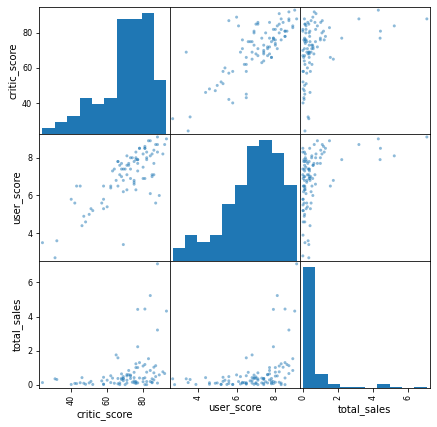

,critic_score,user_score,total_sales
critic_score,1.00000,0.770080,0.348380
user_score,0.77008,1.000000,0.400219
total_sales,0.34838,0.400219,1.000000



PSP


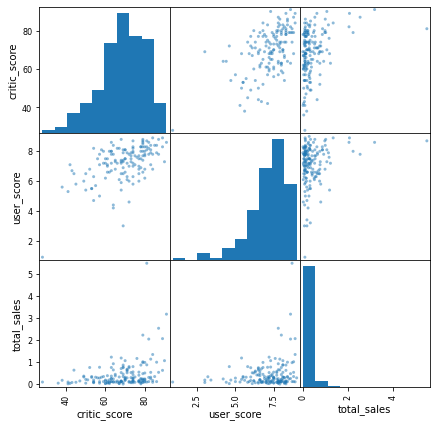

,critic_score,user_score,total_sales
critic_score,1.000000,0.545900,0.334681
user_score,0.545900,1.000000,0.216562
total_sales,0.334681,0.216562,1.000000



PS2


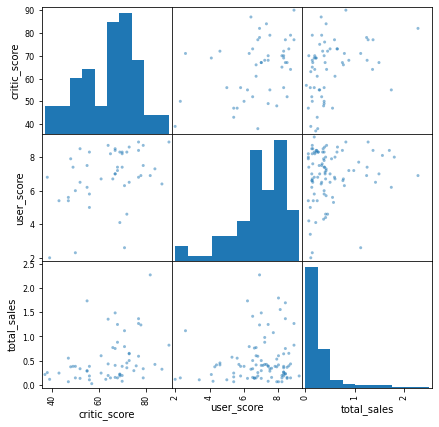

,critic_score,user_score,total_sales
critic_score,1.000000,0.387115,0.344831
user_score,0.387115,1.000000,0.122372
total_sales,0.344831,0.122372,1.000000



PSV


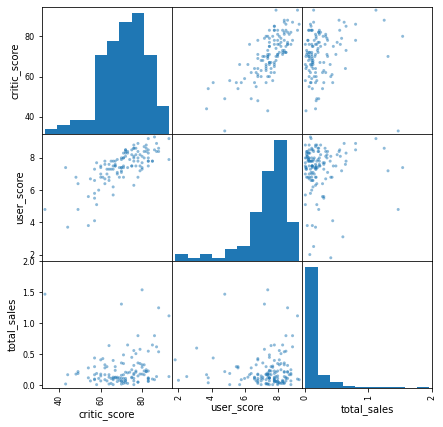

,critic_score,user_score,total_sales
critic_score,1.000000,0.734300,0.131763
user_score,0.734300,1.000000,0.013489
total_sales,0.131763,0.013489,1.000000


In [26]:
platforms_2008_2016 = df_2008_2016['platform'].unique().remove_categories(['XB', 'DC']).dropna()

for platform in platforms_2008_2016:
    print('\033[1m' + platform + '\033[0m')
    scatter_matrix(df_2008_2016.loc[df_2008_2016['platform']==platform, ['critic_score', 'user_score', 'total_sales']],
                   figsize=(7, 7))
    plt.show()
    display(df_2008_2016.loc[df_2008_2016['platform']==platform, ['critic_score', 'user_score', 'total_sales']].corr())
    print()

Матрицы диаграмм рассения и корреляции для остальных платформ похожи на те, что мы видели у PS3. Однако две платформы выделяются; это Nintendo Wii U и PS Vita. У Wii U количество проданных копий зависит от пользовательских оценок чуть больше, чем от экспертных, а у PS Vita эти параметры почти равны.

### Исследование жанров<a name="Исследование-жанров"></a>

#### Количество вышедших игры по жанрам

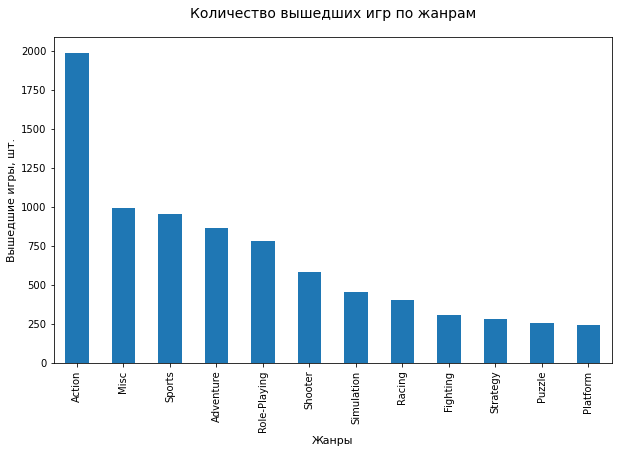

In [27]:
games_per_genre_2008_2016 = df_2008_2016.pivot_table(index='genre',
                                                     values=['name', 'total_sales'],
                                                     aggfunc=['count', 'sum', 'mean'])
games_per_genre_2008_2016.columns = ['number_of_games', 'total_sales_count', 'total_sales_sum', 'total_sales_mean']
games_per_genre_2008_2016 = games_per_genre_2008_2016.drop(['total_sales_count'], axis='columns')

(games_per_genre_2008_2016
     .sort_values(by='number_of_games', ascending=False)
     .plot(use_index=True, y='number_of_games', kind='bar', legend=False, figsize=(10, 6)))

plt.title('Количество вышедших игр по жанрам', fontsize=14, y=1.04)
plt.xlabel('Жанры', fontsize=11)
plt.ylabel('Вышедшие игры, шт.', fontsize=11)

n_released_games_per_genre_2008_2016_graph = plt.gcf()

Экшн-игры по количеству тайтлов почти в два раза превосходят ближайшого конкурента — спортивные симуляторы (жанр  Misc, к которому относятся игры, не вошедшие в другие категории, рассматривать не будем). От спортивных игр немного отстают приключения и ролевые игры, а дальше, с шутеров начинается довольно сильное падение.

#### Количество проданных копий по жанрам

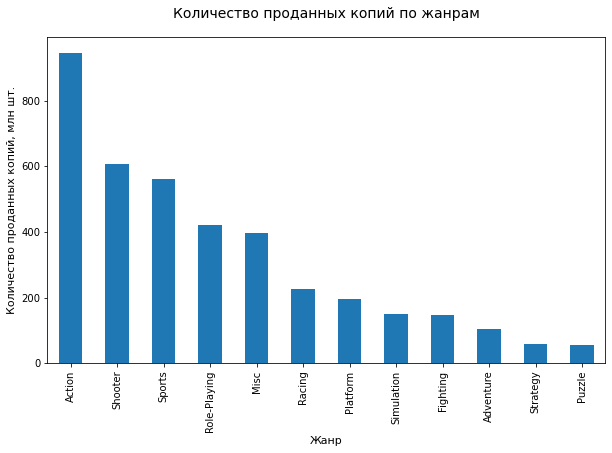

In [28]:
(games_per_genre_2008_2016
     .sort_values(by='total_sales_sum', ascending=False)
     .plot(use_index=True, y='total_sales_sum', kind='bar',
           legend=False, figsize=(10, 6)))

plt.title('Количество проданных копий по жанрам', fontsize=14, y=1.04)
plt.xlabel('Жанр', fontsize=11)
plt.ylabel('Количество проданных копий, млн шт.', fontsize=11)

n_saled_games_per_genre_2008_2016_graph = plt.gcf()

По количеству проданных копий на первом месте снова экшн-игры.

На втором и третьем местах примерно с одинаковым количеством продаж шутеры и спортивные симуляторы. Причем отставание от экшн-игр в процентном соотношении не такое большое, как по количеству тайтлов. Это значит, что одну и ту же игру в этих жанрах покапупают чаще, чем экш-игры. 

Убедимся в этом с помощью графика.

#### Среднее количество проданных копий одной игры по жанрам

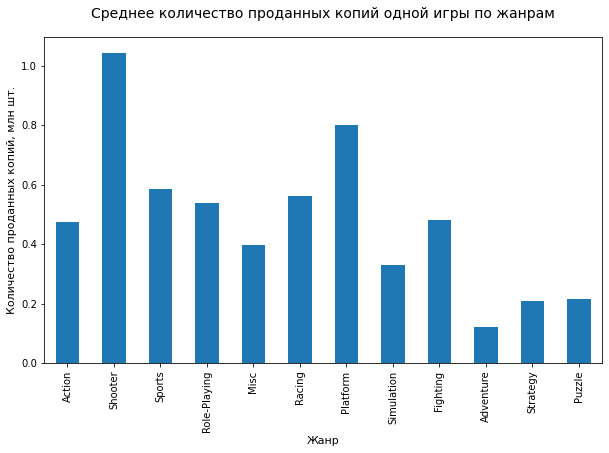

In [29]:
(games_per_genre_2008_2016
     .sort_values(by='total_sales_sum', ascending=False)
     .plot(use_index=True, y='total_sales_mean', kind='bar',
           legend=False, figsize=(10, 6)))

plt.title('Среднее количество проданных копий одной игры по жанрам', fontsize=14, y=1.04)
plt.xlabel('Жанр', fontsize=11)
plt.ylabel('Количество проданных копий, млн шт.', fontsize=11)

mean_game_sales_per_genre_2008_2016_graph = plt.gcf()

Среднюю игру-шутер покупают в два раза чаще, чем экшн-игры. Так же популярностью пользуются платформеры.

[К содержанию](#Содержание)

## 4. Портреты пользователей из разных регионов<a name="4.-Портреты-пользователей-из-разных-регионов"></a>

### Топ-5 платформ по популярности для каждого региона<a name="Топ-5-платформ-по-популярности-для-каждого-региона"></a>

Построим распределения количества проданных копий по платформам для каждого региона. В этом нам поможет сводная таблица по платформам с суммарными продажами в кажом регионе. 

In [30]:
regions_dict = {
    'na_sales': 'Северная Америка',
    'eu_sales': 'Европа',
    'jp_sales': 'Япония'
}

In [31]:
games_sales_per_platform_2008_2016 = df_2008_2016.pivot_table(index='platform',
                                                              values=['na_sales', 'eu_sales', 'jp_sales'],
                                                              aggfunc='sum')
games_sales_per_platform_2008_2016

,eu_sales,jp_sales,na_sales
platform,,,
3DS,61.270000,100.620003,82.650002
DC,0.000000,0.040000,0.000000
DS,86.129997,76.120003,198.729996
PC,92.169998,0.000000,41.070000
PS2,14.240000,8.470000,32.910000
PS3,293.730011,74.110001,349.130005
PS4,141.089996,15.960000,108.739998
PSP,26.210001,60.459999,34.040001
PSV,13.070000,21.840000,12.470000


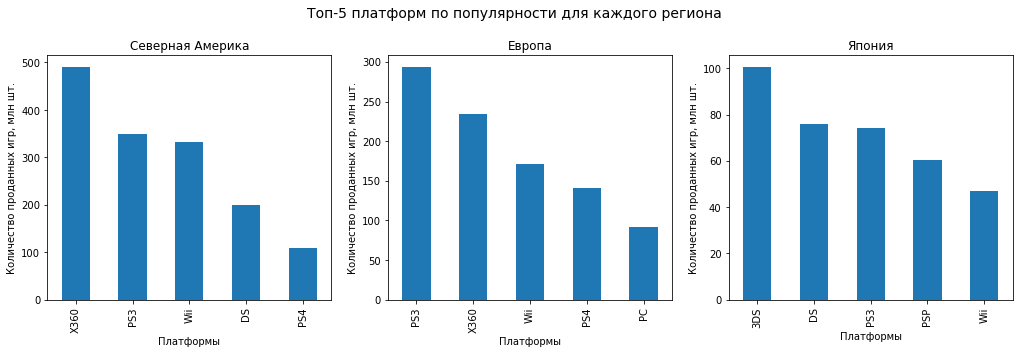

In [32]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17.3, 4.5))
fig.suptitle('Топ-5 платформ по популярности для каждого региона', y=1.03, fontsize=14)
for axis, region in zip((ax1, ax2, ax3), ['na_sales', 'eu_sales', 'jp_sales']):
    (games_sales_per_platform_2008_2016
     .sort_values(by=region, ascending=False)
     .head(5)
     .plot(kind='bar', y=region, ax=axis, legend=False,
           title=regions_dict[region])
    )

plt.setp((ax1, ax2, ax3), xlabel='Платформы', ylabel='Количество проданных игр, млн шт.')

top_5_popular_platforms_by_regions_graph = plt.gcf()

Как видно, столбцы на графиках уже отсортированы по количеству проданных копий, а так же их количество ограничено нужными нам пятью платформами. Посмотрим, какой процент от рынка региона занимает каждая платформа, и продолжим обзор.

In [33]:
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    new_column_name = 'share_of_' + region
    games_sales_per_platform_2008_2016[new_column_name] = (
        games_sales_per_platform_2008_2016[region] / games_sales_per_platform_2008_2016[region].sum() * 100)
    games_sales_per_platform_2008_2016[new_column_name] = (
        games_sales_per_platform_2008_2016[new_column_name].astype('float64').round(2))
    print('\033[1m' + regions_dict[region] + '\033[0m')
    display((games_sales_per_platform_2008_2016[[region, new_column_name]]
             .sort_values(by=region, ascending=False).head(5)))
    print()

Северная Америка


,na_sales,share_of_na_sales
platform,,
X360,490.690002,27.04
PS3,349.130005,19.24
Wii,332.869995,18.34
DS,198.729996,10.95
PS4,108.739998,5.99



Европа


,eu_sales,share_of_eu_sales
platform,,
PS3,293.730011,24.27
X360,234.880005,19.41
Wii,170.740005,14.11
PS4,141.089996,11.66
PC,92.169998,7.62



Япония


,jp_sales,share_of_jp_sales
platform,,
3DS,100.620003,23.55
DS,76.120003,17.82
PS3,74.110001,17.34
PSP,60.459999,14.15
Wii,47.009998,11.00


Как видно из распределений и таблиц, в Америке и Европе лидируют домашние консоли. А вот в Японии три из топ-5 платформ — это портативные устройства. Также можно отметить, что Япония является родиной для всех платформ из японского топ-5. 3DS, DS и Wii производит Nintendo, а PS3 и PSP — Sony.

### Топ-5 жанров по популярности для каждого региона<a name="Топ-5-жанров-по-популярности-для-каждого-региона"></a>

Теперь посмотрим, какие жанры популярны в разных регионах. Воспользуемся схемой из прошлого пункта: построим сводную таблицу, по ней — распределения, а также расчитаем доли рынка.

In [34]:
games_per_genre_2008_2016 = df_2008_2016.pivot_table(index='genre',
                                                     values=['na_sales', 'eu_sales', 'jp_sales'],
                                                     aggfunc='sum')
games_per_genre_2008_2016

,eu_sales,jp_sales,na_sales
genre,,,
Action,310.589996,90.160004,433.739990
Adventure,29.870001,23.360001,43.520000
Fighting,34.730000,23.059999,74.610001
Misc,107.000000,37.330002,211.610001
Platform,60.200001,23.010000,92.330002
Puzzle,17.020000,5.970000,28.209999
Racing,91.620003,11.390000,94.290001
Role-Playing,94.459999,138.119995,155.809998
Shooter,208.350006,15.930000,311.260010


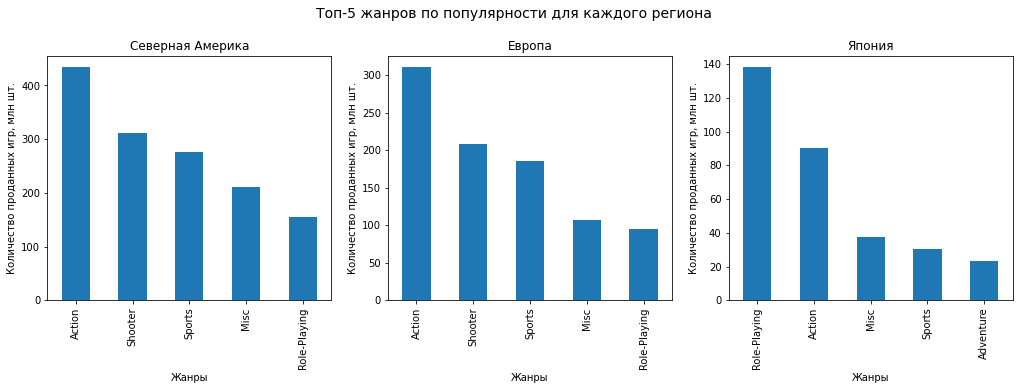

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17.3, 4.5))
fig.suptitle('Топ-5 жанров по популярности для каждого региона', y=1.03, fontsize=14)
for axis, region in zip((ax1, ax2, ax3), ['na_sales', 'eu_sales', 'jp_sales']):
    (games_per_genre_2008_2016
         .sort_values(by=region, ascending=False)
         .head(5)
         .plot(kind='bar', y=region, ax=axis, legend=False, title=regions_dict[region])
    )

plt.setp((ax1, ax2, ax3), xlabel='Жанры', ylabel='Количество проданных игр, млн шт.')

top_5_popular_genres_by_regions_graph = plt.gcf()

In [36]:
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    new_column_name = 'share_of_' + region
    games_per_genre_2008_2016[new_column_name] = (
        games_per_genre_2008_2016[region] / games_per_genre_2008_2016[region].sum() * 100)
    games_per_genre_2008_2016[new_column_name] = (
        games_per_genre_2008_2016[new_column_name].astype('float64').round(2))
    print('\033[1m' + regions_dict[region] + '\033[0m')
    display((games_per_genre_2008_2016[[region, new_column_name]]
             .sort_values(by=region, ascending=False).head(5)))
    print()

Северная Америка


,na_sales,share_of_na_sales
genre,,
Action,433.739990,23.90
Shooter,311.260010,17.15
Sports,276.269989,15.22
Misc,211.610001,11.66
Role-Playing,155.809998,8.59



Европа


,eu_sales,share_of_eu_sales
genre,,
Action,310.589996,25.66
Shooter,208.350006,17.21
Sports,185.190002,15.30
Misc,107.000000,8.84
Role-Playing,94.459999,7.80



Япония


,jp_sales,share_of_jp_sales
genre,,
Role-Playing,138.119995,32.33
Action,90.160004,21.10
Misc,37.330002,8.74
Sports,30.690001,7.18
Adventure,23.360001,5.47


Распределния популярных жанров в Америке и Европе очень похожи: совпадает весь топ-5 игр и даже доли примерно равны. Скорее всего, это связано с глобализацией и общей похожестью американцев и европецев. 

В Японии самый популярный жанр — ролевые игры. Они занимают почти треть продаж. На втором месте экшн-игры, доля которых примерно равно доле этого жанра в Америке и Европе. Доля спортивных игр почти в два раза меньше, чем в двух других регионах.

### Влияние рейтинга ESRB на продажи в регионе<a name="Влияние-рейтинга-ESRB-на-продажи-в-регионе"></a>

Построим для регионов такие же распределения, как в двух прошлых пунтах. Только теперь индексами будут рейтинги ESRB.

In [37]:
games_sales_per_rating_2008_2016 = df_2008_2016.pivot_table(index='rating',
                                                            values=['na_sales', 'eu_sales', 'jp_sales'],
                                                            aggfunc='sum')
games_sales_per_rating_2008_2016

,eu_sales,jp_sales,na_sales
rating,,,
AO,0.000000,0.000000,0.000000
E,326.609985,77.169998,536.929993
E10+,144.529999,25.670000,251.880005
EC,0.000000,0.000000,1.320000
K-A,0.000000,0.000000,0.000000
M,362.649994,39.330002,502.600006
RP,0.030000,0.000000,0.000000
T,187.619995,64.510002,303.410004


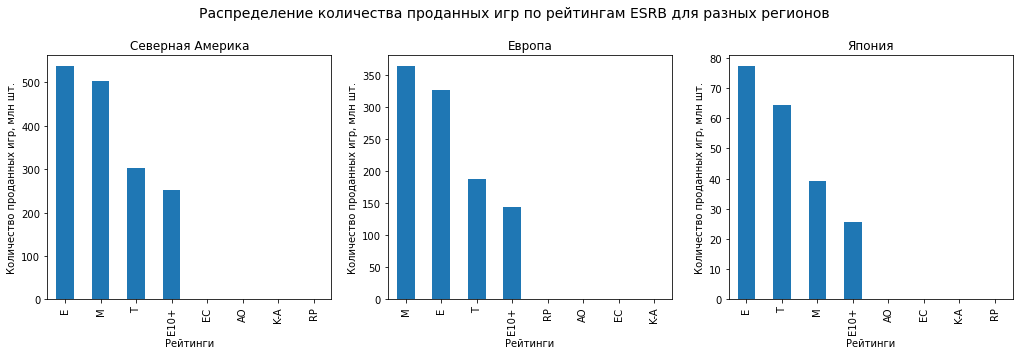

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17.3, 4.5))
fig.suptitle('Распределение количества проданных игр по рейтингам ESRB для разных регионов', y=1.03, fontsize=14)
for axis, region in zip((ax1, ax2, ax3), ['na_sales', 'eu_sales', 'jp_sales']):
    (games_sales_per_rating_2008_2016
     .sort_values(by=region, ascending=False)
     .plot(kind='bar', y=region, ax=axis, legend=False,
           title=regions_dict[region]))

plt.setp((ax1, ax2, ax3), xlabel='Рейтинги', ylabel='Количество проданных игр, млн шт.')

top_5_popular_age_ratings_by_regions_graph = plt.gcf()

In [39]:
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    new_column_name = 'share_of_' + region
    games_sales_per_rating_2008_2016[new_column_name] = (
        games_sales_per_rating_2008_2016[region] / games_sales_per_rating_2008_2016[region].sum() * 100)
    games_sales_per_rating_2008_2016[new_column_name] = (
        games_sales_per_rating_2008_2016[new_column_name].astype('float64').round(2))
    print('\033[1m' + regions_dict[region] + '\033[0m')
    display((games_sales_per_rating_2008_2016[[region, new_column_name]]
             .sort_values(by=region, ascending=False)))
    print()

Северная Америка


,na_sales,share_of_na_sales
rating,,
E,536.929993,33.64
M,502.600006,31.49
T,303.410004,19.01
E10+,251.880005,15.78
EC,1.320000,0.08
AO,0.000000,0.00
K-A,0.000000,0.00
RP,0.000000,0.00



Европа


,eu_sales,share_of_eu_sales
rating,,
M,362.649994,35.50
E,326.609985,31.98
T,187.619995,18.37
E10+,144.529999,14.15
RP,0.030000,0.00
AO,0.000000,0.00
EC,0.000000,0.00
K-A,0.000000,0.00



Япония


,jp_sales,share_of_jp_sales
rating,,
E,77.169998,37.34
T,64.510002,31.21
M,39.330002,19.03
E10+,25.670000,12.42
AO,0.000000,0.00
EC,0.000000,0.00
K-A,0.000000,0.00
RP,0.000000,0.00


Распределения в Америке и Европе снова очень похожи. Там почти треть рынка занимают игры для всех возрастов и еще треть — игры для взрослых. Оставшуюся треть примерно пополам делят игры для подростков и для детей старше 10 лет.

В Японии наиболее популярны игры для всех возрастов, на которые приходится 37% местного рынка. На втором месте с небольшим отстованием и 31% продаж игры для подростков. Затем идут игры для взрослых (19%) и для детей старше 10 лет (12,5%).

### Вывод

Мы узнали, что Америка и Европа очень похожи в плане игр. В обоих регионах популярны домашние приставки, а играют на них в экшны, шутеры, спортивные симуляторы и ролевые игры. Треть игр предназначена для людей всех возрастов, треть — только для взрослых, а последнюю треть примерно поровну делят игры для подростков и детей от 10 лет.

Япония сильно отличается от Америки и Европы: там популярные портативные косоли, а играют на них в основном в ролевые игры и экшны. Также в Японии игры для подростков популярнее, чем игры для взрослых.

[К содержанию](#Содержание)

## 5. Общий вывод<a name="5.-Общий-вывод"></a>

Основной задачей исследования было выявить определяющие успешность игры закономерности. Вот, что мы узнали:
1. Игровые платформы в среднем «живут» 10 лет. Поэтому игры для платформ старше 9 лет лучше не закупать. [Читать](#Изучение-продаж-по-платформам)
2. Коммерческий успех игры не зависит от оценок пользователей и слабо коррелирует с оценками критиков. [Читать](#Влияние-отзывов-критиков-и-пользователей-на-продажи)
3. Самые популярные жанры игр — экшн, шутер, спортивный симулятор и ролевая игра. Это относится в целом к рынку игр ([читать](#Исследование-жанров)) и к Америке с Европой в частности. В Японии место шутеров занимают приключения. [Читать](#Топ-5-жанров-по-популярности-для-каждого-региона)

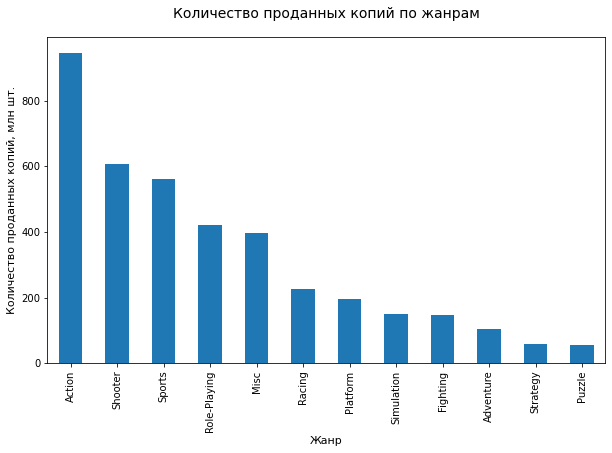

In [40]:
n_saled_games_per_genre_2008_2016_graph

При этом если смотреть на среднюю игру в жанре, то окажется, что шутеры и платформеры покупают чаще экшн игр. Преимущество экшн-игр в продажах объясняется тем, что таких выпускают гораздо больше.

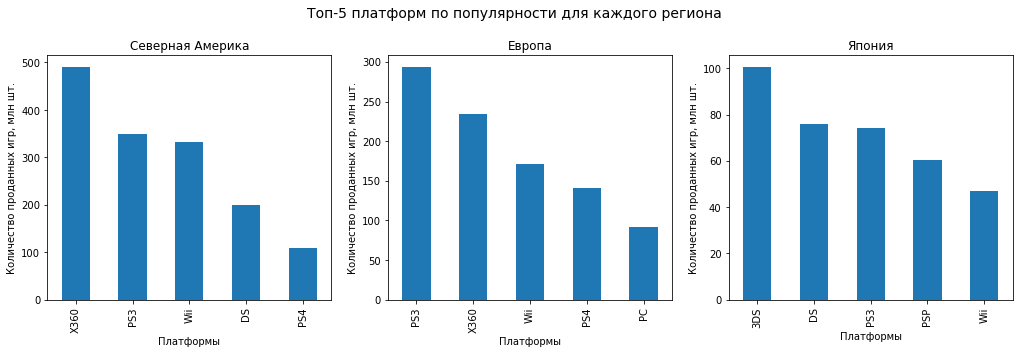

In [41]:
top_5_popular_platforms_by_regions_graph

4. В Америке и Европе предпочитают домашние консоли, а в Японии — портативные. [Читать](#Топ-5-платформ-по-популярности-для-каждого-региона)

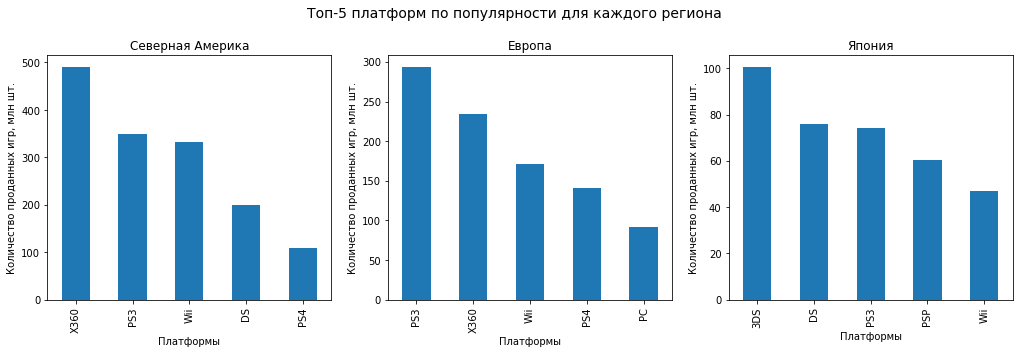

In [42]:
top_5_popular_platforms_by_regions_graph

5. Лучше всего продаются игры для всех возрастов. На втором месте игры для взрослых, на третьем и четвертом — для подростков и детей страше 10 лет соответственно. [Читать](#Влияние-рейтинга-ESRB-на-продажи-в-регионе)

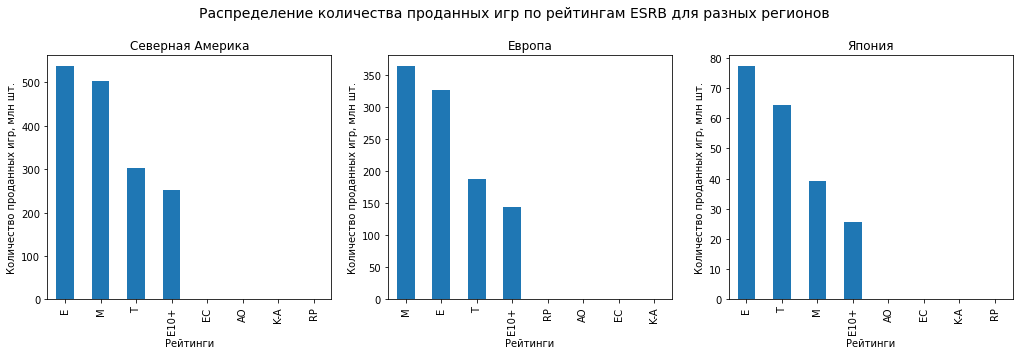

In [43]:
top_5_popular_age_ratings_by_regions_graph

Также мы определили наиболее перспективные платформы для 2017 года. Это:

1. **PS4** и **Xbox One** как самые новые и набирающие популярность платформы;
2. **Nintendo 3DS** и **Nintendo Wii U**. Видимо, они уже прошли пики своей популярности, но игры для них продолжают пользоваться спросом.
3. **PC** и **PS Vita**. Продажи игр для этих платформ скромные по сравнению с другими платформами из списка, зато стабильные. А предсказуемость — это большой плюс для планирования.

[Читать](#Потенциально-прибыльные-платформы) 

[К содержанию](#Содержание)